## **Importing the libraries**

In [94]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)
from tqdm import tqdm
tqdm.pandas(desc="my bar!")

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
from nltk.stem import WordNetLemmatizer  
le=WordNetLemmatizer()

import re
from textblob import TextBlob
from collections import Counter
from sklearn.manifold import TSNE
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
from bokeh.plotting import figure, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

In [93]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD

In [ ]:
!pip install pyLDAvis

In [ ]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import register_func
/usr/local/lib/python3.7/dist-packages/scipy/sparse/sputils.py:17: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  supported_dtypes = [np.typeDict[x] for x in supported_dtypes]
/usr/local/lib/python3.7/dist-packa

## **Getting the data**

In [11]:
documents = pd.read_csv("documents.csv")
print("There are ", len(documents), " documents in total.\n")
print("The first 5 rows of the dataset are:\n")
print(documents.head())

There are  25637  documents in total.

The first 5 rows of the dataset are:

                                            document
0  My husband is a born shopper. He loves to look...
1  Tea drinking was common in China for nearly on...
2  Once upon a time, there was a scholar who want...
3  When newspapers and radio describe the damage ...
4  Below is a page adapted from About Wikipedia  ...


## **Splitting the dataset into training set and test set**

In [12]:
# 90% of the documents will be in the training set
# Shuffle the dataset randomly
dataframe = documents.sample(frac = 1).reset_index(drop = True)

train_doc = dataframe[:int(len(documents)*0.9)]
test_doc = dataframe[int(len(documents)*0.9):]

print("There are ", len(train_doc), " many rows in the training set.\n")
print("There are ", len(test_doc), " many rows in the test set.\n")

There are  23073  many rows in the training set.

There are  2564  many rows in the test set.



In [13]:
dataset = [train_doc, test_doc]

## **Cleaning the documents**

In [14]:
abbreviations = {
    "what's":"what is",
    "what're":"what are",
    "who's":"who is",
    "who're":"who are",
    "where's":"where is",
    "where're":"where are",
    "when's":"when is",
    "when're":"when are",
    "how's":"how is",
    "how're":"how are",
    "i'm":"i am",
    "we're":"we are",
    "you're":"you are",
    "they're":"they are",
    "it's":"it is / has",
    "he's":"he is / has",
    "she's":"she is / has",
    "that's":"that is / has",
    "there's":"there is / has",
    "there're":"there are",
    "i've":"i have",
    "we've":"we have",
    "you've":"you have",
    "they've":"they have",
    "who've":"who have",
    "would've":"would have",
    "not've":"not have",
    "i'll":"i will",
    "we'll":"we will",
    "you'll":"you will",
    "he'll":"he will",
    "she'll":"she will",
    "it'll":"it will",
    "they'll":"they will",
    "isn't":"is not",
    "wasn't":"was not",
    "aren't":"are not",
    "weren't":"were not",
    "can't":"can not",
    "couldn't":"could not",
    "don't":"do not",
    "didn't":"did not",
    "shouldn't":"should not",
    "wouldn't":"would not",
    "doesn't":"does not",
    "haven't":"have not",
    "hasn't":"has not",
    "hadn't":"had not",
    "won't":"will not",
    "ain't": "am not / are not",
    "he'd": "he had / he would",
    "he'd've": "he would have",
    "he'll've": "he will have",
    "how'd": "how did / had",
    "how'll": "how will",
    "how's": "how has / how is",
    "i'd": "I had / I would",
    "i'd've": "I would have",
    "i'll've": "I will have",
    "it'd": "it had / it would",
    "it'd've": "it would have",
    "it'll've": "it will have",
    "let's": "let us",
    "ma'am": "madam",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she had / she would",
    "she'd've": "she would have",
    "she'll've": "she will have",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "that'd": "that would / that had",
    "that'd've": "that would have",
    "there'd": "there had / there would",
    "there'd've": "there would have",
    "they'd": "they had / they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "we'd": "we had / we would",
    "we'd've": "we would have",
    "we'll've": "we will have",
    "what'll": "what will",
    "what'll've": "what will have",
    "what've": "what have",
    "when've": "when have",
    "where'd": "where did",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who've": "who have",
    "why've": "why have",
    "will've": "will have",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had / you would",
    "you'd've": "you would have",
    "you'll've": "you will have"
}

In [15]:
# Define a function that transforms texts into an acceptable formats

def clean_documents(text):

  # Paramater:
  # text: the text to be cleaned

  # Return values:
  # cleaned_text: the cleaned or transformed version of the given text
  
  # If the text is null, just return it
  if pd.isnull(text):
    return text
    
  text = text.lower()
  for word in text.split():
    if word in abbreviations:
      text = text.replace(word, abbreviations[word])
            
  text = re.sub("[^a-zA-Z]", " ", text)
  word_tokens  = nltk.word_tokenize(text)
  
  # Assume that words with length <= 3 do not carry a lot of meaning
  tokens = []
  for w in word_tokens:
    if w not in stop_words and len(w) > 3:
      tokens.append(le.lemmatize(w))

  cleaned_text =" ".join(tokens)
    
  return cleaned_text

In [18]:
# Clean the documents in the training set and store the cleaned texts in the training dataframe
train_doc["cleaned_document"] = train_doc["document"].progress_apply(lambda x: clean_documents(x))

my bar!: 100%|██████████| 23073/23073 [00:58<00:00, 396.26it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
print("The first 5 rows of the cleaned training set are:\n")
print(train_doc.head())

The first 5 rows of the cleaned training set are:

                                            document  \
0  At the entrance to one of the ruined temples o...   
1  Last fall,beekeepers from states with warm cli...   
2  Just one bite of cake that is made with eggs i...   
3  A long time ago, there was a seed and because ...   
4  Steps Shoes Salon\nSteps Shoes Salon, 4518 S.C...   

                                    cleaned_document  
0  entrance ruined temple petra jordan inscriptio...  
1  last fall beekeeper state warm climate began r...  
2  bite cake made egg enough make john feel sick ...  
3  long time seed seed nobody noticed thus feelin...  
4  step shoe salon step shoe salon cottage grove ...  


In [20]:
# Clean the test set too
test_doc["cleaned_document"] = test_doc["document"].progress_apply(lambda x: clean_documents(x))

my bar!: 100%|██████████| 2564/2564 [00:05<00:00, 433.97it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## **Couting word occurrences in the documents**

In [21]:
# Define a function that returns the top n words that occur the most in a given text

def top_n_words(n, count_vectorizer, documents):
  
  # Parameters:
  # n: the number of top words that occur the most in the given text
  # count_vectorizer: an object of the CountVectorizer class
  # documents: the texts or documents to be scrutinized

  # Return values:
  # words: the top n words that occur the most
  # count_list: the counts of the top n words

  # Count the total occurrence of each word 
  # vectorized_docs will have #columns = #words
  vectorized_docs = count_vectorizer.fit_transform(documents.values)
  vectorized_sum = np.sum(vectorized_docs, axis = 0)

  # Arrange the indices of the words based on their counts in the descending order
  # Keep track of their respective counts
  word_indices = np.flip(np.argsort(vectorized_sum)[0, :], 1)
  word_counts = np.flip(np.sort(vectorized_sum)[0, :], 1)

  # word_vectors will have 1 in an entry that corresponds to a word
  word_vectors = np.zeros((n, vectorized_docs.shape[1]))
  for i in range(n):
    word_vectors[i, word_indices[0, i]] = 1

  words = []
  for word in count_vectorizer.inverse_transform(word_vectors):
    words.append(word[0].encode("ascii").decode("utf-8"))

  count_list = word_counts[0, :n].tolist()[0]

  return words, count_list


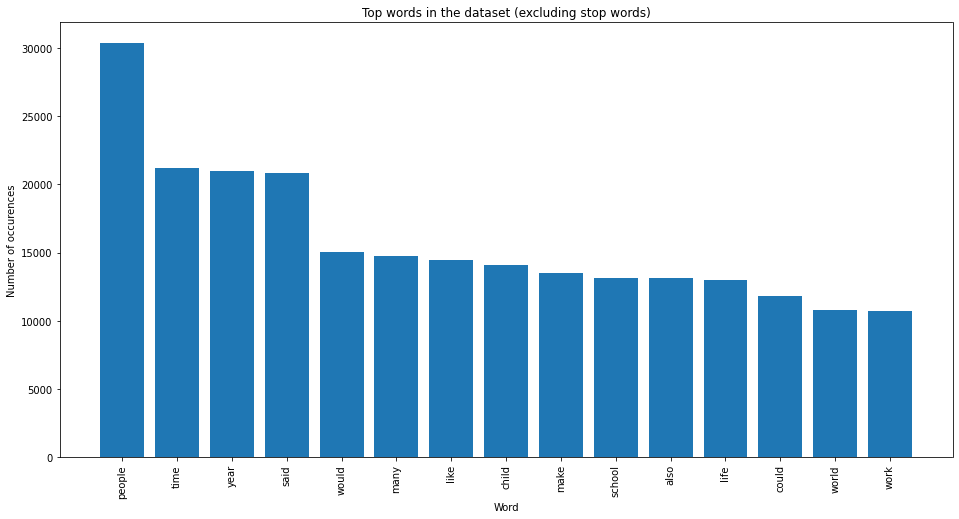

In [22]:
# Visualize the top n words that occur the most in our documents
words, word_counts = top_n_words(15, CountVectorizer(), train_doc["cleaned_document"])

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_counts);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation = "vertical");
ax.set_title("Top words in the dataset (excluding stop words)");
ax.set_xlabel("Word");
ax.set_ylabel("Number of occurences");
plt.show()

In [23]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


In [24]:
# Define a function that calculate the statistics of the words in the documents

def stats_of_docs(data_df):
  # TextBlob.pos_tags will tag each word with the type of word it is such as nouns, verbs, etc.
  # word_tags will contain a list of word-tag pair for each document

  data = data_df["cleaned_document"].tolist()
  tagged_headlines = [TextBlob(data[i]).pos_tags for i in range(len(data))]
    
  # Create a dataframe where each row corresponds to a document and the column contains lists of their word-tag pairs
  tagged_headlines_df = pd.DataFrame({'tags':tagged_headlines})

  # word_counts: the number of words in each document
  # pos_counts: the number of occurences of each type of word such as nouns, verbs, etc.
  word_counts = [] 
  pos_counts = {}

  for headline in tagged_headlines_df[u'tags']:
    word_counts.append(len(headline))
    for tag in headline:
      if tag[1] in pos_counts:
        pos_counts[tag[1]] += 1
      else:
        pos_counts[tag[1]] = 1

  print("Total number of words: ", np.sum(word_counts))
  print("Mean number of words per document: ", np.mean(word_counts))
  print("Minimum number of words per document: ", np.min(word_counts))
  print("Maximum number of words per document: ", np.max(word_counts))

  pos_sorted_types = sorted(pos_counts, key = pos_counts.__getitem__, reverse = True)
  pos_sorted_counts = sorted(pos_counts.values(), reverse = True)

  fig, ax = plt.subplots(figsize = (18,8))
  ax.bar(range(len(pos_counts)), pos_sorted_counts);
  ax.set_xticks(range(len(pos_counts)));
  ax.set_xticklabels(pos_sorted_types);
  ax.set_title("Number of occurrences of each type of word");
  ax.set_xlabel("Type of word");

The statistics of the documents:

Total number of words:  3166773
Mean number of words per document:  137.2501625276297
Minimum number of words per document:  28
Maximum number of words per document:  572
None


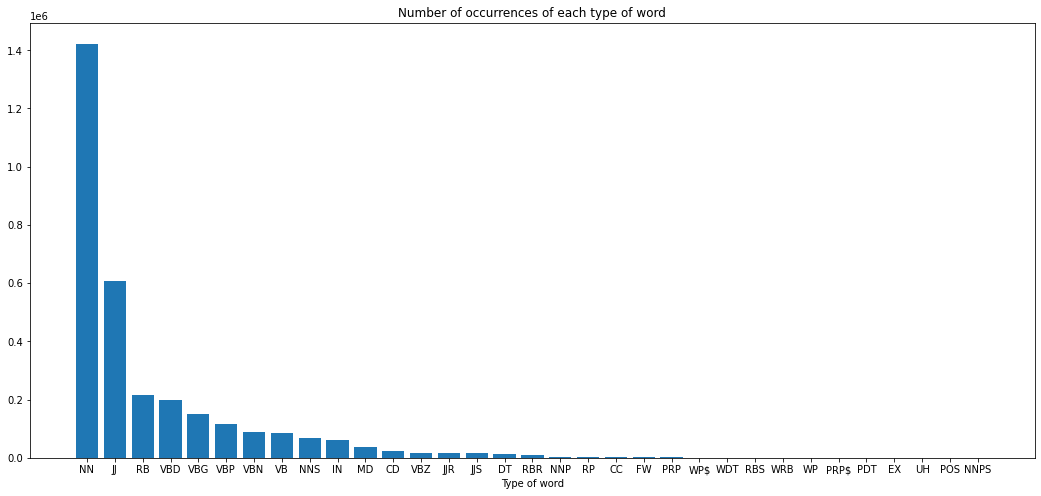

In [25]:
print("The statistics of the documents:\n")
print(stats_of_docs(train_doc))

## **Topic modeling with LSA on training set**

In [26]:
# Convert a collection of raw documents to a matrix of TF-IDF features.
vectors = TfidfVectorizer(stop_words = stop_words, max_features = 4000)
vect_text = vectors.fit_transform(train_doc["cleaned_document"])

# Do dimensionality reduction on the TF-IDF matrix using truncated SVD 
lsa_model = TruncatedSVD(n_components = 10, algorithm = "randomized", n_iter = 10, random_state = 42)
lsa_topics  = lsa_model.fit_transform(vect_text)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [27]:
# Look at the TF-IDF scores of each topic in the first document
print("TF-IDF scores of each topic in the first document :")
for i, score in enumerate(lsa_topics[1]):
  print("Topic ", i, " has score ", score)

TF-IDF scores of each topic in the first document :
Topic  0  has score  0.0839589168504513
Topic  1  has score  -0.03495215197523244
Topic  2  has score  -0.056831153677534475
Topic  3  has score  0.0037432867113235064
Topic  4  has score  -0.052589221341755775
Topic  5  has score  -0.010865499290250184
Topic  6  has score  0.006693399246845015
Topic  7  has score  0.04462456947571893
Topic  8  has score  0.007487502497742505
Topic  9  has score  0.024924266177401944


In [28]:
# Define a function to look at the TF-IDF scores of each topic in all the documents
# It also finds the most dominant topic, a.k.a. the topic with the highest score for each document

def topic_document_score(model, n , data):
    
    # Parameters: 
    # model_output: the lsa model which is the document-TF-IDF matrix that has undergone SVD
    # n: the number of topics
    # data: the documents dataset

    # Return value:
    # document_topic_df: a dataframe that contains the TF-IDF scores of each topic for each document
    
    # Define the column names
    col = ["Topic" + str(i) for i in range(n)]

    # Define the index or row names
    row = ["Doc" + str(i) for i in range(len(data))]

    # Create the pandas dataframe
    document_topic_df = pd.DataFrame(np.round(model, 2), columns = col, index = row)

    # Get the dominant topics for each document
    dominant_topic = np.argmax(document_topic_df.values, axis = 1)
    document_topic_df["dominant_topic"] = dominant_topic
    
    return document_topic_df

In [29]:
document_topic_lsa = topic_document_score(lsa_topics, 10, train_doc)
print("The TF-IDF scores of each topic in all the documents:\n")
print(document_topic_lsa)

The TF-IDF scores of each topic in all the documents:

          Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  \
Doc0        0.11   -0.06   -0.06   -0.04   -0.05    0.08    0.03   -0.06   
Doc1        0.08   -0.03   -0.06    0.00   -0.05   -0.01    0.01    0.04   
Doc2        0.22    0.00   -0.09    0.21   -0.08   -0.10    0.05    0.16   
Doc3        0.14   -0.07    0.04   -0.02    0.03   -0.02    0.03    0.02   
Doc4        0.13   -0.05    0.04   -0.01   -0.02    0.02   -0.01   -0.04   
...          ...     ...     ...     ...     ...     ...     ...     ...   
Doc23068    0.08   -0.02   -0.01    0.00    0.03   -0.01    0.02   -0.01   
Doc23069    0.23   -0.05   -0.06    0.00   -0.06   -0.04   -0.16    0.08   
Doc23070    0.14   -0.07   -0.11   -0.06   -0.11    0.13    0.06   -0.13   
Doc23071    0.13   -0.10   -0.08    0.00   -0.06   -0.04    0.16    0.05   
Doc23072    0.16   -0.00   -0.04   -0.01    0.02    0.02   -0.02   -0.08   

          Topic8  Topic9  domina

In [30]:
# Define some helper functions
# Define a function that returns a list of predicted topic categories for a given topic matrix

def get_dominant_indices(topic_matrix):
  
  # Parameter:
  # topic_matrix: the lsa topics dataframe which is the document-TF-IDF matrix that has undergone SVD

  # Return value:
  # dominant_topic_indices: a list of indices of the topics (a.k.a the number of topic) that score the highest for each document

  dominant_topic_indices = topic_matrix.argmax(axis = 1).tolist()

  return dominant_topic_indices


# Define a function that counts the occurence of each category and return them with their counts

def indices_to_counts(dominant_topic_indices):

  # Parameter:
  # dominant_topic_indices: a list of indices of the topics (a.k.a the number of topic) that score the highest for each document

  # Return values:
  # categories: a list of the topics
  # counts: a list of the numbers of occurence of each topic

  # Counter counts the occurence of each topic and store them in a dictionary
  # .items() turn the dictionary into key-value tuples
  topic_count = Counter(dominant_topic_indices).items()
  
  categories = []
  counts = []
  for item in topic_count:
    categories.append(item[0])
    counts.append(item[1])

  return categories, counts

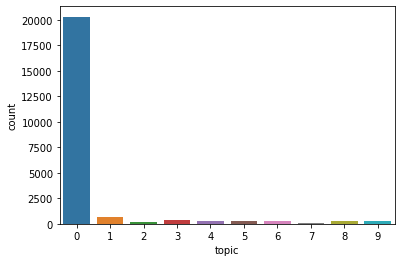

In [31]:
# Get the topics along with to their numbers of occurrence
lsa_dom_topics = get_dominant_indices(lsa_topics)
lsa_categories, lsa_counts = indices_to_counts(lsa_dom_topics)

# Create a dataframe that records the topics and their respective counts in all documents
topics_df = pd.DataFrame({'topic' : lsa_categories, 'count' : lsa_counts})

# Show the bar chart of the topics and their respective counts
sns.barplot(x = topics_df['topic'], y = topics_df['count'])
plt.show()

In [32]:
# Get the top 10 words that occur the most in each topic
vocab = vectors.get_feature_names()

print("The top 10 words that occur the most in each topic are:\n")

#lsa_model.componenets_ return our term_topic matrix
for i, component in enumerate(lsa_model.components_):
  
  # Pair up the 4000 most occurred words with the 4000 scores of the words in the currenly inspected document
  vocab_comp = zip(vocab, component)

  # Sort the words based on their scores in descending order
  # Get only the top 10 words
  sorted_words = sorted(vocab_comp, key = lambda x : x[1], reverse = True)[:10]

  print("Topic " + str(i) + ": ")
  for word in sorted_words:
    print(word[0], end = " ")
  print("\n")

The top 10 words that occur the most in each topic are:

Topic 0: 
people child said school time year student would life like 

Topic 1: 
student school child teacher parent class english education college study 

Topic 2: 
child mother father said parent school went would girl asked 

Topic 3: 
child parent kid family food people life health need brain 

Topic 4: 
english language book word friend people read reading learn thing 

Topic 5: 
english child chinese language china book city country world year 

Topic 6: 
water food english animal school plant language tree fish like 

Topic 7: 
language english said study woman animal brain word water researcher 

Topic 8: 
book reading read water animal story earth plant scientist library 

Topic 9: 
food book reading read meal eating restaurant said chinese healthy 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [33]:
# Define a function that returns the centroid vectors of each topic or category

def get_mean_topic_vectors(indices, vectors, n):

  # Parameters:
  # indices: the indices of the dominant topics for each document
  # vectors: the tsne_lsa_vectors
  # n: the number of topics

  # Return value:
  # mean_topic_vectors: the centroid vectors of each topic

  mean_topic_vectors = []
  # Go through each topic
  for i in range(n):
    docs_in_this_topic = []

    # Go through each document and look at its dominant topic index
    for j in range(len(indices)):
      if indices[j] == i:
        docs_in_this_topic.append(vectors[j])

    # Stack the documents that belong to the same topic together
    docs_in_this_topic = np.vstack(docs_in_this_topic)
    mean_doc_in_this_topic = np.mean(docs_in_this_topic, axis = 0)
    mean_topic_vectors.append(mean_doc_in_this_topic)

  return mean_topic_vectors

In [34]:
# Define 10 different colors
colors = np.array(["#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c","#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5"])

In [35]:
# Define an t-SNE model to visualize our high-dimensional data in 2D
# Choose n_components = 2 to put everything into 2 dimension
tsne_lsa_model = TSNE(n_components = 2, perplexity = 50, learning_rate = 100, n_iter = 2000, verbose = 1, random_state = 0, angle = 0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topics)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23073 samples in 0.032s...
[t-SNE] Computed neighbors for 23073 samples in 6.453s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23073
[t-SNE] Computed conditional probabilities for sample 2000 / 23073
[t-SNE] Computed conditional probabilities for sample 3000 / 23073
[t-SNE] Computed conditional probabilities for sample 4000 / 23073
[t-SNE] Computed conditional probabilities for sample 5000 / 23073
[t-SNE] Computed conditional probabilities for sample 6000 / 23073
[t-SNE] Computed conditional probabilities for sample 7000 / 23073
[t-SNE] Computed conditional probabilities for sample 8000 / 23073
[t-SNE] Computed conditional probabilities for sample 9000 / 23073
[t-SNE] Computed conditional probabilities for sample 10000 / 23073
[t-SNE] Computed conditional probabilities for sample 11000 / 23073
[t-SNE] Computed conditional probabilities for sample 12000 / 23073
[t-SNE] Computed conditional probabilities for sa

In [40]:
# Get the centroid vectors of each topic
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_dom_topics, tsne_lsa_vectors, 10)

# Plot the t-SNE clusters
plot = figure(title = "t-SNE clustering of 10 topics", plot_width = 700, plot_height = 700)
plot.scatter(x = tsne_lsa_vectors[:,0], y = tsne_lsa_vectors[:,1], color = colors[lsa_dom_topics])

for i in range(10):
  label = Label(x = lsa_mean_topic_vectors[i][0], y = lsa_mean_topic_vectors[i][1], text_color = colors[i])
  plot.add_layout(label)
    
show(plot)

In [41]:
# Define a function to generate a word cloud for given topic

def draw_word_cloud(topic_index, model):

  # Parameters:
  # index: the index of the topic that we want to generate a word cloud for
  # model: the lsa model where its entries contain the scores for each word 

  words_list = ""
  vocab = vectors.get_feature_names()

  #model.componenets_ return our term_topic matrix
  comp = model.components_[topic_index]
  vocab_comp = zip(vocab, comp)

  # This time, we get the top 50 words that occur the most
  sorted_words = sorted(vocab_comp, key = lambda x : x[1], reverse = True)[:50]
  for word in sorted_words:
    words_list = words_list + " " + word[0]

  wordcloud = WordCloud(width = 600, height = 400).generate(words_list)
  plt.figure(figsize = (5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


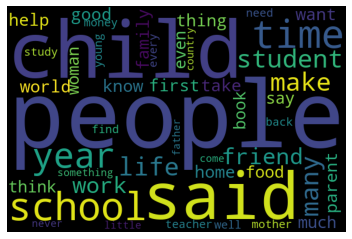

In [42]:
# Try the function with the first topic
draw_word_cloud(0, lsa_model)

## **Topic modeling with LSA on test set**

The statistics of the documents:

Total number of words:  351877
Mean number of words per document:  137.23751950078002
Minimum number of words per document:  34
Maximum number of words per document:  384
None


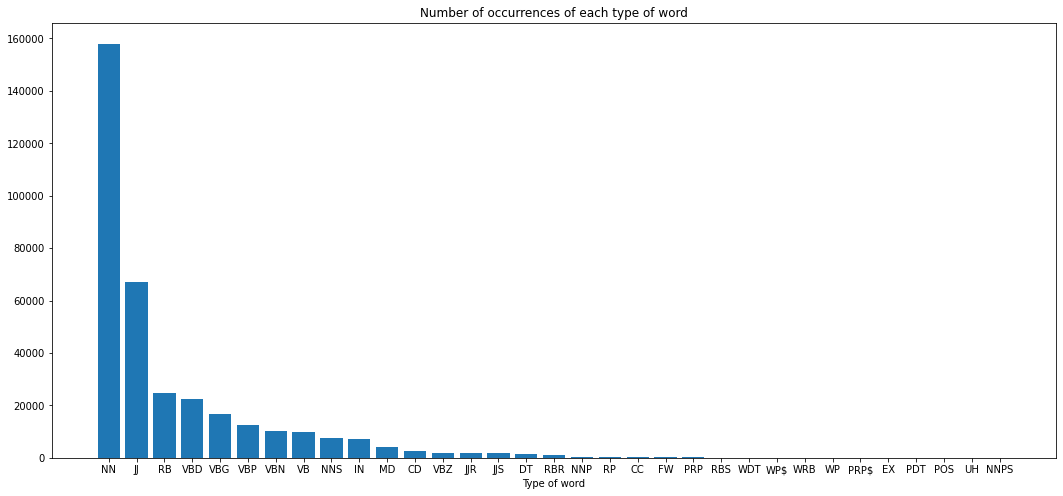

In [43]:
print("The statistics of the documents:\n")
print(stats_of_docs(test_doc))

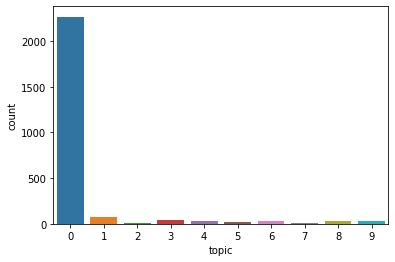

In [44]:
# Transform the test set using the fit or trained models
vect_text_test = vectors.transform(test_doc["cleaned_document"])
lsa_top_test = lsa_model.transform(vect_text_test)

lsa_dom_indices_test = get_dominant_indices(lsa_top_test)
lsa_categories_test, lsa_counts_test = indices_to_counts(lsa_dom_indices_test)

# Plot the bar chart that shows the occurrences of each topic
topics_df_test = pd.DataFrame({'topic' : lsa_categories_test, 'count' : lsa_counts_test})
sns.barplot(x = topics_df_test['topic'], y = topics_df_test['count'])
plt.show()

In [45]:
documet_topic_lsa_test = topic_document_score(lsa_top_test, 10, test_doc)
print("The TF-IDF scores of each topic in all the documents:\n")
print(documet_topic_lsa_test)

The TF-IDF scores of each topic in all the documents:

         Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  \
Doc0       0.17   -0.04   -0.06   -0.05   -0.07    0.11   -0.06    0.00   
Doc1       0.34    0.21    0.14    0.03   -0.01   -0.03    0.12   -0.11   
Doc2       0.26    0.04   -0.02   -0.02    0.06   -0.12   -0.05    0.01   
Doc3       0.24    0.01    0.06    0.09    0.22   -0.04    0.04   -0.09   
Doc4       0.17   -0.06   -0.10    0.05   -0.02   -0.09    0.03    0.10   
...         ...     ...     ...     ...     ...     ...     ...     ...   
Doc2559    0.14   -0.05   -0.09    0.05   -0.02   -0.12    0.09    0.04   
Doc2560    0.16   -0.07    0.06   -0.03   -0.02    0.01   -0.00   -0.03   
Doc2561    0.21   -0.02    0.02   -0.12   -0.04    0.03   -0.02    0.04   
Doc2562    0.16   -0.05   -0.06   -0.05   -0.04    0.10    0.08   -0.04   
Doc2563    0.20   -0.06   -0.18    0.05   -0.10   -0.02    0.13   -0.01   

         Topic8  Topic9  dominant_topic  
Do

We can see that most of the documents belong to the same topic which is topic 0 even for the test set. Therefore, LSA with SVD and t-SNE is not doing well in this case.

## **Topic modeling with LDA on the training set**

In [46]:
# Count how many times each word has occurred in the documents using CountVectorizer
# This time, only words that occur at least 10 times are considered to save the dimension
vectorizer = CountVectorizer(min_df = 10)
vectorized_doc_lda = vectorizer.fit_transform(train_doc["cleaned_document"])

In [47]:
# Build an LDA Model
# We first set n_components, which corresponds to the number of topic, to 20
# We can adjust later
lda_model = LatentDirichletAllocation(n_components = 20, max_iter = 10, learning_method = "online", random_state = 100, batch_size = 128, evaluate_every = -1, n_jobs = -1)
lda_output = lda_model.fit_transform(vectorized_doc_lda)

print("The parameters of the LDA model are set to:\n")
print(lda_model)  

The parameters of the LDA model are set to:

LatentDirichletAllocation(learning_method='online', n_components=20, n_jobs=-1,
                          random_state=100)


In [48]:
# Look at how the LDA model performs based on its perplexity and log-likelihood

# Log Likelyhood: the higher the better
print("Log Likelihood: ", lda_model.score(vectorized_doc_lda))

# Perplexity: the lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(vectorized_doc_lda))

# See model parameters
print("The parameters of the LDA model are set to:\n", lda_model.get_params())

Log Likelihood:  -23300816.768656522
Perplexity:  2111.116421441114
The parameters of the LDA model are set to:
 {'batch_size': 128, 'doc_topic_prior': None, 'evaluate_every': -1, 'learning_decay': 0.7, 'learning_method': 'online', 'learning_offset': 10.0, 'max_doc_update_iter': 100, 'max_iter': 10, 'mean_change_tol': 0.001, 'n_components': 20, 'n_jobs': -1, 'perp_tol': 0.1, 'random_state': 100, 'topic_word_prior': None, 'total_samples': 1000000.0, 'verbose': 0}


In [50]:
print(vectorized_doc_lda.shape)

(23073, 10980)


In [63]:
# The size of the vectorized_doc_lda matrix is too big
# Reduce the size by randomly picking 1000 rows from it
rand_num = np.random.choice(range(23074), 1000, replace=False)

vectorized_doc_lda_reduced = vectorized_doc_lda[rand_num, :]
vectorized_doc_lda_reduced.shape

(1000, 10980)

In [72]:
# Use ramdomized search to find the best parameters

search_params = {'n_components': [10, 15, 20], 'learning_decay': [.5, .7, .9]}
lda_model = LatentDirichletAllocation(max_iter = 5, learning_method = "online", learning_offset = 50, random_state = 0)
model = RandomizedSearchCV(lda_model, search_params, n_jobs=-1, cv=3, random_state = 0)
model.fit(vectorized_doc_lda_reduced)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


RandomizedSearchCV(cv=3,
                   estimator=LatentDirichletAllocation(learning_method='online',
                                                       learning_offset=50,
                                                       max_iter=5,
                                                       random_state=0),
                   n_jobs=-1,
                   param_distributions={'learning_decay': [0.5, 0.7, 0.9],
                                        'n_components': [10, 15, 20]},
                   random_state=0)

In [73]:
best_lda_model = model.best_estimator_
print("The parameters of the best LDA model: ", model.best_params_)
print("The log likelihood score of the best LDA model: ", model.best_score_)
print("The perplexity of the best LDA model: ", best_lda_model.perplexity(vectorized_doc_lda))

The parameters of the best LDA model:  {'n_components': 10, 'learning_decay': 0.5}
The log likelihood score of the best LDA model:  -394793.2178299758
The perplexity of the best LDA model:  3553.1845487181636


In [74]:
# Apply the best LDA model on our vectorized data
lda_output = best_lda_model.fit_transform(vectorized_doc_lda)

In [75]:
documet_topic_lda = topic_document_score(lda_output, 10, train_doc)
print("The score (probability) of each topic in all the documents:\n")
print(documet_topic_lda)

The score (probability) of each topic in all the documents:

          Topic0  Topic1  Topic2  Topic3  Topic4  Topic5  Topic6  Topic7  \
Doc0        0.18    0.00    0.20    0.01    0.39    0.02    0.10    0.02   
Doc1        0.00    0.21    0.00    0.00    0.04    0.00    0.41    0.21   
Doc2        0.04    0.22    0.00    0.00    0.00    0.02    0.72    0.00   
Doc3        0.39    0.19    0.00    0.00    0.05    0.30    0.00    0.06   
Doc4        0.17    0.40    0.07    0.09    0.02    0.02    0.00    0.17   
...          ...     ...     ...     ...     ...     ...     ...     ...   
Doc23068    0.01    0.00    0.46    0.00    0.00    0.40    0.01    0.12   
Doc23069    0.16    0.02    0.02    0.19    0.07    0.04    0.41    0.01   
Doc23070    0.00    0.05    0.23    0.00    0.30    0.00    0.00    0.13   
Doc23071    0.05    0.21    0.03    0.00    0.13    0.08    0.09    0.41   
Doc23072    0.00    0.00    0.37    0.07    0.00    0.36    0.02    0.00   

          Topic8  Topic9  

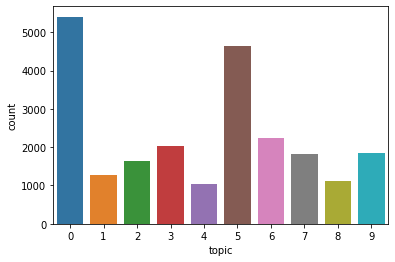

In [76]:
# Get the topics along with their numbers of occurrence
lda_dom_topics = get_dominant_indices(lda_output)
lda_categories, lda_counts = indices_to_counts(lda_dom_topics)

# Create a dataframe that records the topics and their respective counts in all documents
topics_df_lda = pd.DataFrame({'topic' : lda_categories, 'count' : lda_counts})

# Show the bar chart of the topics and their respective counts
sns.barplot(x = topics_df_lda['topic'], y = topics_df_lda['count'])
plt.show()

In [83]:
# Define a function to show the top n keywords for each topic

def show_topic_keywords(vectorizer, lda_model, n):
  words = np.array(vectorizer.get_feature_names())
  topic_keywords = []

  for topic_weights in lda_model.components_:
    # Sort the words based on their scores in descending order
    # Get only the top n words
    top_keyword_indices = (-topic_weights).argsort()[:n]
    topic_keywords.append(words.take(top_keyword_indices))

  return topic_keywords

In [84]:
# Get the top 15 words that occur the most in each topic
topic_keywords = show_topic_keywords(vectorizer, best_lda_model, 15)

topic_keywords_df = pd.DataFrame(topic_keywords)
topic_keywords_df.columns = ['Word ' + str(i) for i in range(topic_keywords_df.shape[1])]
topic_keywords_df.index = ['Topic ' + str(i) for i in range(topic_keywords_df.shape[0])]

print("The top 15 words that occur the most in each topic are:\n")
print(topic_keywords_df)

The top 15 words that occur the most in each topic are:

          Word 0    Word 1   Word 2  Word 3      Word 4     Word 5    Word 6  \
Topic 0     said     would    could    year      mother       went      back   
Topic 1     food      like     game   drink        good     eating       say   
Topic 2    world      year    music   first        book      story    famous   
Topic 3  company  computer     work   phone    internet     online  business   
Topic 4     city     space   travel    road       place     driver      time   
Topic 5   people      make     time   thing        like       life    friend   
Topic 6    study    people    found  health  researcher      woman  research   
Topic 7    water    animal    plant    year        many  scientist      bird   
Topic 8     said     china  country    year      people    chinese      city   
Topic 9   school   student    child  parent     teacher    college     class   

         Word 7      Word 8      Word 9      Word 10    Word 1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [85]:
# Build a t-SNE model to visualize our data in 2D
tsne_lda_model = TSNE(n_components = 2, perplexity = 50, learning_rate = 100, n_iter = 2000, verbose = 1, random_state = 0, angle = 0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_output)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 23073 samples in 0.033s...
[t-SNE] Computed neighbors for 23073 samples in 4.234s...
[t-SNE] Computed conditional probabilities for sample 1000 / 23073
[t-SNE] Computed conditional probabilities for sample 2000 / 23073
[t-SNE] Computed conditional probabilities for sample 3000 / 23073
[t-SNE] Computed conditional probabilities for sample 4000 / 23073
[t-SNE] Computed conditional probabilities for sample 5000 / 23073
[t-SNE] Computed conditional probabilities for sample 6000 / 23073
[t-SNE] Computed conditional probabilities for sample 7000 / 23073
[t-SNE] Computed conditional probabilities for sample 8000 / 23073
[t-SNE] Computed conditional probabilities for sample 9000 / 23073
[t-SNE] Computed conditional probabilities for sample 10000 / 23073
[t-SNE] Computed conditional probabilities for sample 11000 / 23073
[t-SNE] Computed conditional probabilities for sample 12000 / 23073
[t-SNE] Computed conditional probabilities for sa

In [86]:
# Get the centroid vectors of each topic
lda_mean_topic_vectors = get_mean_topic_vectors(lda_dom_topics, tsne_lda_vectors, 10)

# Plot the t-SNE clusters
plot = figure(title="t-SNE clusters of 10 LDA topics", plot_width = 700, plot_height = 700)
plot.scatter(x = tsne_lda_vectors[:,0], y = tsne_lda_vectors[:,1], color = colors[lda_dom_topics])

for i in range(10):
  label = Label(x = lda_mean_topic_vectors[i][0], y = lda_mean_topic_vectors[i][1], text_color = colors[i])
  plot.add_layout(label)

show(plot)

In [87]:
# Visualize our data using pyLDAvis
display_data = pyLDAvis.sklearn.prepare(best_lda_model, vectorized_doc_lda, vectorizer) 
                        
pyLDAvis.display(display_data)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


## **Topic modeling with LDA on the test set**

In [89]:
vectorized_doc_lda_test = vectorizer.transform(test_doc["cleaned_document"])
lda_output_test = best_lda_model.transform(vectorized_doc_lda_test)

In [90]:
documet_topic_lda_test = topic_document_score(lda_output_test, 10, test_doc)
documet_topic_lda_test

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.14,0.00,0.28,0.02,0.02,0.05,0.10,0.00,0.40,0.00,8
Doc1,0.12,0.00,0.00,0.00,0.08,0.53,0.00,0.00,0.00,0.25,5
Doc2,0.00,0.00,0.00,0.08,0.05,0.58,0.15,0.01,0.00,0.13,5
Doc3,0.00,0.05,0.07,0.00,0.03,0.71,0.00,0.00,0.00,0.13,5
Doc4,0.05,0.20,0.00,0.00,0.03,0.16,0.42,0.12,0.03,0.00,6
...,...,...,...,...,...,...,...,...,...,...,...
Doc2559,0.00,0.28,0.00,0.11,0.00,0.23,0.27,0.10,0.00,0.00,1
Doc2560,0.45,0.04,0.00,0.11,0.11,0.15,0.00,0.03,0.12,0.00,0
Doc2561,0.40,0.07,0.09,0.08,0.12,0.03,0.01,0.07,0.09,0.04,0
Doc2562,0.02,0.11,0.27,0.03,0.22,0.10,0.00,0.02,0.22,0.01,2
